In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import math
from astropy import table
from astropy.table import Table, join, unique
from astropy.io import ascii
import astropy.io.fits as pyfits
from astropy.wcs import WCS
import os


In [2]:
# import SNeCO data
SNe_Gal_File = '../Data/3.SNe+GalData.csv'
SNe_Gal_Data = Table.read(SNe_Gal_File, format='csv') 

intenFile = '../Data/3.IntenData.csv'
intenData = Table.read(intenFile, format='csv')

database  = join(SNe_Gal_Data, intenData, keys=('SN_name', "galaxy"))

database[0:1]

SNe      = SNe_Gal_Data["SN_name"]
SNeCheck = database["SN_name"]
SNRs     = database["pc150SNR"]

# for i in range(len(database)):
#     print(SNe[i], SNeCheck[i], SNRs[i])
    
# print(database["SN_name"][0:3],database["pc150SNR"][0:3])

In [3]:
# File location: /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc7793/ngc7793_7m+tp_co21_150pc_broad_mom0.fits

In [16]:
# isolate unique galaxies, their distances, and their telescope orientation
galData = unique(SNe_Gal_Data,"galaxy")
gals, telOrient = galData["galaxy"], galData["telOrient"]

# for i in range(len(gals)):
#     print(gals[i], telOrient[i])

In [5]:
pc60FileList, pc90FileList, pc60errFile, pc90errFile = [],[],[],[]

def fileStr(galaxy, telOrient, res, mapType="img"):
    if galaxy ==  "ngc0628":
        telOrient = "12m+7m"
    if galaxy == "ngc3627":
        telOrient = "2_12m+7m"
    if galaxy == "ngc5236":
        telOrient = "12m+7m"
    if galaxy =="ngc6744":
        telOrient = "12m+7m+tp"        
        
    if mapType == "img":
        return("/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/" + galaxy + "/" + galaxy + "_" + telOrient + "_co21_" + str(res) + "pc_broad_mom0.fits")
    else:
        return("/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/" + galaxy + "/" + galaxy + "_" + telOrient + "_co21_" + str(res) + "pc_broad_emom0.fits")

for i in range(len(gals)):
    pc60FileList.append(fileStr(gals[i], telOrient[i], 60))
    pc60errFile.append(fileStr(gals[i], telOrient[i], 60, mapType="err"))
    pc90FileList.append(fileStr(gals[i], telOrient[i], 90))
    pc90errFile.append(fileStr(gals[i], telOrient[i], 90, mapType="err"))


In [6]:
# group each galaxy's SNe data

gal_groups = database.group_by('galaxy')
galaxies = gal_groups.groups.keys
indices = gal_groups.groups.indices
indices = indices.tolist()
indices.append(0)
#print(gals)
print(indices)
# print(gal_groups["SN_name"][4])

images60, err60, images90, err90, name, types, ras, decs, dists, SNR150 = [],[],[],[],[],[],[],[],[],[]
for i in range(len(indices)-2):
    SNnames, SNtypes, SNras, SNdecs = [],[],[],[]
    images60.append(pc60FileList[i])
    err60.append(pc60errFile[i])
    images90.append(pc90FileList[i])
    err90.append(pc90errFile[i])
    SNR150.append(gal_groups["pc150SNR"][indices[i]])
    #if gal_groups["SN_name"][indices[i]] != "SN1989B" and gal_groups["SN_name"][indices[i]] != "SN1973R":
    # Attach first SN per galaxy to a list
    SNnames.append(gal_groups["SN_name"][indices[i]])
    SNtypes.append(gal_groups["SN_type"][indices[i]])
    SNras.append(gal_groups["SN_ra"][indices[i]])
    SNdecs.append(gal_groups["SN_dec"][indices[i]])
    j = 1
    # attach additional  SN to list when galaxy has more than one
    while(indices[i] + j < indices[i+1]):    
        #if gal_groups["SN_name"][indices[i]+j] != "SN1989B" and gal_groups["SN_name"][indices[i]+j] != "SN1973R":
        SNnames.append(gal_groups["SN_name"][indices[i]+j])
        SNtypes.append(gal_groups["SN_type"][indices[i]+j])
        SNras.append(gal_groups["SN_ra"][indices[i]+j])
        SNdecs.append(gal_groups["SN_dec"][indices[i]+j])
        j += 1
    name.append(SNnames)
    types.append(SNtypes)
    ras.append(SNras)
    decs.append(SNdecs)
    dists.append(gal_groups["dist"][indices[i]])
print(name)
print(dists)

[0, 1, 2, 3, 4, 5, 7, 10, 11, 12, 16, 18, 19, 20, 21, 23, 24, 28, 32, 39, 45, 46, 47, 49, 50, 52, 53, 55, 60, 61, 62, 63, 0]
[['SN1996cr'], ['SN1940E'], ['SN2013ej'], ['SN2018ivc'], ['SN1995V'], ['SN1992bd', 'SN1999eu'], ['SN1983V', 'SN2001du', 'SN2012fr'], ['SN1985P'], ['SN1935C'], ['SN1984J', 'SN1986L', 'SN2005df', 'SN2009ib'], ['ASASSN-14ha', 'SN2010el'], ['SN1999em'], ['SN2017gax'], ['SN1993Z'], ['SN2003jg', 'SN2008eh'], ['SN2012A'], ['SN1973R', 'SN1989B', 'SN2009hd', 'SN2016cok'], ['SN1967H', 'SN1972Q', 'SN1986I', 'SN2014L'], ['SN1926A', 'SN1961I', 'SN1964F', 'SN1999gn', 'SN2006ov', 'SN2014dt', 'SN2020jfo'], ['SN1901B', 'SN1959E', 'SN1979C', 'SN2006X', 'SN2019ehk', 'SN2020oi'], ['SN2012cg'], ['SN2020nvb'], ['SN1960F', 'SN1988M'], ['SN1981B'], ['SN1988A', 'SN1989M'], ['SN2011ja'], ['SN1986G', 'SN2016adj'], ['SN1923A', 'SN1950B', 'SN1957D', 'SN1968L', 'SN1983N'], ['SN2007it'], ['SN2005at'], ['SN2008bk']]
[4.2, 3.7, 9.84, 13.97, 15.85, 13.58, 19.57, 18.63, 15.28, 19.44, 17.69, 11.7, 

In [7]:
for i in range(len(images60)):
    print(i,images60[i])

0 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_60pc_broad_mom0.fits
1 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0253/ngc0253_7m+tp_co21_60pc_broad_mom0.fits
2 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0628/ngc0628_12m+7m_co21_60pc_broad_mom0.fits
3 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1068/ngc1068_7m+tp_co21_60pc_broad_mom0.fits
4 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1087/ngc1087_12m+7m+tp_co21_60pc_broad_mom0.fits
5 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1097/ngc1097_12m+7m+tp_co21_60pc_broad_mom0.fits
6 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1365/ngc1365_12m+7m+tp_co21_60pc_broad_mom0.fits
7 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1433/ngc1433_12m+7m+tp_co21_60pc_broad_mom0.fits
8 /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1511/ngc1511_12m+7m+tp_co21_60pc_broad_mom0.fits
9 /da

In [8]:
def getPlotStuff(gal, imageA, errorA, imageB, errorB, names, types, ras, decs, dists, SNRs):
    plots, sigma, wcss, hdus, beamsizes, plotAspect, ppb, corner, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts, samDists, isDetec = [],[],[], [],[],[],[],[],[],[],[],[],[],[],[],[]

    for i in range(len(gal)):
        for j in range(len(names[i])):
            
            if os.path.isfile(imageA[i]):
                if names[i][j] == "SN1989B" or names[i][j] == "SN1973R":
                    img = "/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc3627/ngc3627_12m+7m+tp_co21_90pc_broad_mom0.fits"
                    err = "/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc3627/ngc3627_12m+7m+tp_co21_90pc_broad_emom0.fits"
#                 elif names[i][j] == "SN1923A" or names[i][j] == "SN1950B" or names[i][j] == "SN1957D" or names[i][j] == "SN1968L" or names[i][j] == "SN1983N":
#                     img = "/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc5236/ngc5236_9_12m+7m_co21_60pc_broad_mom0.fits"
#                     err = "/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc5236/ngc5236_9_12m+7m_co21_60pc_broad_emom0.fits"
                else:
                    img = imageA[i]
                    err=errorA[i]
                print(img)
                co_hdu = pyfits.open(img)
                hdus.append(co_hdu)

                beamMaj = co_hdu[0].header['BMAJ']
                beamMin = co_hdu[0].header['BMIN']

                if(beamMaj==beamMin):
                    beamsizes.append(beamMaj)
                else:
                    beamsizes.append(0.0)

                co_map = co_hdu[0].data
                plots.append(co_map)
                err_hdu = pyfits.open(err)
                err_map = err_hdu[0].data
                sig_map = co_map / err_map
                sigma.append(sig_map)
                w = WCS(co_hdu[0].header, naxis=2)
                wcss.append(w)
                x = co_map.shape[0]
                y = co_map.shape[1]
                naxis    = w._naxis # size of image naxis[0] = x and [1] = y
                grid     = np.indices((naxis[1],naxis[0]))
                aspect = float(y)/float(x)
                cdelt = co_hdu[0].header['CDELT1']
                cdelts.append(cdelt)
                ppb.append(beamMaj/np.abs(cdelt))
                plotAspect.append(aspect)
                corner.append(x/15.0)

                SNnames.append(name[i][j])
                SNtypes.append(types[i][j])
                SNras.append(ras[i][j]) 
                SNdecs.append(decs[i][j])
                SNgals.append(gal[i])
                samDists.append(dists[i])

                if(SNRs[i]) >= 3.0:
                    isDetec.append("Detection")
                else:
                    isDetec.append("Nondetection")


            elif os.path.isfile(imageB[i]):
                img = imageB[i]
                err=errorB[i]   
                print(img)


                co_hdu = pyfits.open(img)
                hdus.append(co_hdu)

                beamMaj = co_hdu[0].header['BMAJ']
                beamMin = co_hdu[0].header['BMIN']

                if(beamMaj==beamMin):
                    beamsizes.append(beamMaj)
                else:
                    beamsizes.append(0.0)

                co_map = co_hdu[0].data
                plots.append(co_map)
                err_hdu = pyfits.open(err)
                err_map = err_hdu[0].data
                sig_map = co_map / err_map
                sigma.append(sig_map)
                w = WCS(co_hdu[0].header, naxis=2)
                wcss.append(w)
                x = co_map.shape[0]
                y = co_map.shape[1]
                naxis    = w._naxis # size of image naxis[0] = x and [1] = y
                grid     = np.indices((naxis[1],naxis[0]))
                aspect = float(y)/float(x)
                cdelt = co_hdu[0].header['CDELT1']
                cdelts.append(cdelt)
                ppb.append(beamMaj/np.abs(cdelt))
                plotAspect.append(aspect)
                corner.append(x/15.0)

                SNnames.append(name[i][j])
                SNtypes.append(types[i][j])
                SNras.append(ras[i][j]) 
                SNdecs.append(decs[i][j])
                SNgals.append(gal[i])
                samDists.append(dists[i])

                if(SNRs[i]) >= 3.0:
                    isDetec.append("Detection")
                else:
                    isDetec.append("Nondetection")

            else:
                #print("no file for ")
                pass

    return(plots, sigma, wcss, hdus, beamsizes, plotAspect, ppb, corner, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts, samDists, isDetec)

In [9]:
# set up 60pc plots, wcs information, and make sigma maps for contours.

plots60, sigma60, wcss60, hdus60, beamsizes60, plotAspect60, ppb60, corner60, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts, samDists, isDetection = getPlotStuff(gals, images60, err60, images90, err90, name, types, ras, decs, dists, SNR150)

print(SNnames)

/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0628/ngc0628_12m+7m_co21_60pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1433/ngc1433_12m+7m+tp_co21_90pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1637/ngc1637_12m+7m+tp_co21_90pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc3239/ngc3239_12m+7m+tp_co21_90pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc3627/ngc3627_12m+7m+tp_co21_90pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc3627/ngc3627_12m+7m+tp_co21_90pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc3627/ngc3627_2_12m+7m_co21_60pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc3627/ngc3627_2_12m+7m_co21_60pc_broad_mom0.fits
/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc4424/ngc4424_12m+7m+tp_co21_90pc_broad_mom0.fits
/data/tycho/0/l

In [10]:
legendLabels = []

for i in range(len(SNnames)):
    legendlabel = []
#     if len(SNnames[i]) > 1:
#         for k in range(len(SNnames[i])):
#             if SNtypes[i][k] == 'unclassified':
#                 label = SNnames[i][k] + ' '  + SNtypes[i][k]
#             else:
#                 label = SNnames[i][k] + ' Type '  + SNtypes[i][k]
#             legendlabel.append(label)
#     else:
    if SNtypes[i][0] == 'unclassified':
        legendlabel.append(SNnames[i] + ' '  + SNtypes[i]) 
    else:        
        legendlabel.append(SNnames[i] + ' Type '  + SNtypes[i])
    legendLabels.append(legendlabel)
print(legendLabels)

print(beamsizes60)


[['SN2013ej Type II'], ['SN1985P Type II'], ['SN1999em Type II'], ['SN2012A Type II'], ['SN1973R Type II'], ['SN1989B Type Ia'], ['SN2009hd Type II'], ['SN2016cok Type II'], ['SN2012cg Type Ia'], ['SN2020nvb Type Ia'], ['SN1960F Type Ia'], ['SN1988M Type II'], ['SN1923A Type II'], ['SN1950B Type unclassified'], ['SN1957D Type unclassified'], ['SN1968L Type II'], ['SN1983N Type Ib'], ['SN2007it Type II'], ['SN2005at Type Ic']]
[0.000349364509226111, 0.0003049153591757, 0.000440736765485248, 0.000474826902042118, 0.0004517319625788, 0.0004517319625788, 0.0002830785685173, 0.0002830785685173, 0.000316349305137, 0.000341498023587907, 0.0003482539090036, 0.0003482539090036, 0.000703015699547022, 0.000703015699547022, 0.000703015699547022, 0.000703015699547022, 0.000703015699547022, 0.000420262441416251, 0.000366107217335989]


In [11]:


# import math
# i,j,m=0,0,0
# PLOTS_PER_ROW = 2
# fig, axs = plt.subplots(math.ceil(len(plots60)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10, 40))
# for plot in plots60:
#     draw_circle = plt.Circle((corner60[m], corner60[m]),ppb60[m], fill = True, color = 'white')

#     xArr, yArr = wcss60[m].wcs_world2pix(SNras[m],SNdecs[m],0)
#     logplot = np.log10(plot)
#     axs[i][j].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.0, zorder = 0)
#     axs[i][j].set_title(SNgals[m].upper(), fontsize=20)
#     axs[i][j].set_xticks([])
#     axs[i][j].set_yticks([])
#     axs[i][j].add_patch(draw_circle)
#     #for n in range(len(SNdecs)):
#     axs[i][j].scatter(xArr, yArr, color = "black", marker = "o", s = 140, zorder=2)
#     axs[i][j].scatter(xArr, yArr, color = "lime", marker = "o", s = 160, edgecolor="black", label = legendLabels[m], zorder = 2)
#     axs[i][j].contour(sigma60[m], [3], colors = ["white"], linestyles = ("-"), zorder = 1)
#     axs[i][j].legend(loc="best", fontsize=14, handletextpad=0.007)

#     j+=1
#     if j%PLOTS_PER_ROW==0:
#         i+=1
#         j=0
#     m +=1
# #plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
# plt.show()
# fig.savefig("../Figures/AllSNeInGalaxies_60pc.png", dpi=300)
   
# print()

In [12]:

# numSNe = 22
# m,n,p =0,0,0 # plot counters for total number, rows, columns
# PLOTS_PER_ROW = 3
# fig, axs = plt.subplots(math.ceil(numSNe/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10, 10))

# for j in range(len(SNgals)): # counter to count galaxy maps


#             SNraStart  = SNras[j]  -  halfBox / np.cos(SNdecs[j] * np.pi/180)
#             SNraEnd    = SNras[j]  +  halfBox / np.cos(SNdecs[j] * np.pi/180)
#             SNdecStart = SNdecs[j] -  halfBox
#             SNdecEnd   = SNdecs[j] +  halfBox

#             xVal, yVal     = wcss60[j].wcs_world2pix(SNras[j],SNdecs[j],0)
#             xStart, yStart = wcss60[j].wcs_world2pix(SNraStart, SNdecStart,0)
#             xEnd, yEnd     = wcss60[j].wcs_world2pix(SNraEnd, SNdecEnd,0)
#             xStart, xEnd, yStart, yEnd = int(xStart), int(xEnd), int(yStart), int(yEnd)
#             plot = plots60[j]#[xStart:xEnd][yStart:yEnd]
#             logplot = np.log10(plot)

#             axs[m][n].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.0, zorder = 0)
#             axs[m][n].set_ylim(yStart,yEnd)
#             axs[m][n].set_xlim(xStart,xEnd)
#             axs[m][n].set_title(SNnames[j].upper(), fontsize=20)
#             axs[m][n].set_xticks([])
#             axs[m][n].set_yticks([])
#             axs[m][n].scatter(xVal, yVal, color = "black", marker = "o", s = 60, zorder=2)
#             axs[m][n].scatter(xVal, yVal, color = "lime", marker = "o", s = 80, edgecolor="black",zorder = 2)
            
#             n+=1
#             if n%PLOTS_PER_ROW==0:
#                 m+=1
#                 n=0
#             p +=1


# plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
# plt.show()
# fig.savefig("../Figures/Zooms_60pc.png", dpi=300)


In [13]:
# Next draw out the spheres of influence
def findAngSize(sphere, dist):
    """ Finds the angular size in decimal degrees when given the 
        size of the sphere in pc and the
        distance to the galaxy in Mpc
    """
    
    angSizeRad = np.arctan(sphere/(dist*10**6))
    angSize = angSizeRad * (180/np.pi)
        
    return(angSize)

sphereSizes = [6.3,32,203]
angSizes = []

for i in range(len(samDists)):
    
    ang63 = findAngSize(sphereSizes[0], samDists[i])
    ang32 = findAngSize(sphereSizes[1], samDists[i])
    ang203 = findAngSize(sphereSizes[2], samDists[i])
    
    angSizes.append([ang63, ang32, ang203])

# Not used right now but this code finds the pixel sizes of the spheres un case we want to try to make a scale bar    


In [14]:
print()

<ipython-input-26-7258ac0983a7>:14: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  current_cmap.set_bad("black")
<ipython-input-26-7258ac0983a7>:31: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-26-7258ac0983a7>:31: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)
<ipython-input-26-7258ac0983a7>:31: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-26-7258ac0983a7>:31: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)
<ipython-input-26-7258ac0983a7>:31: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-26-7258ac0983a7>:31: RuntimeWarning: invalid value encount

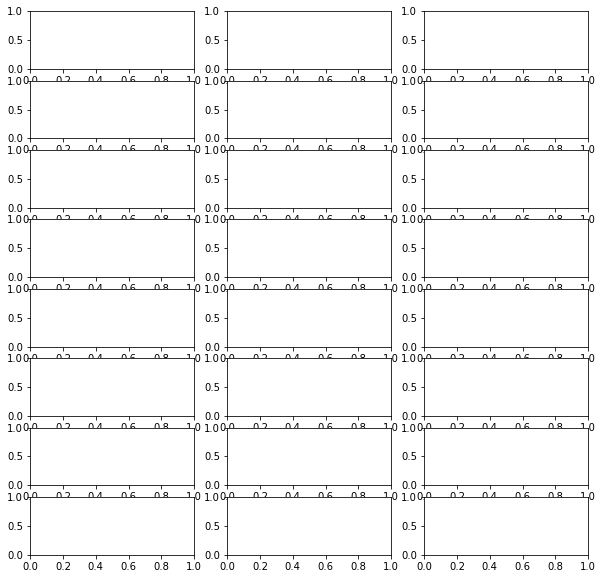

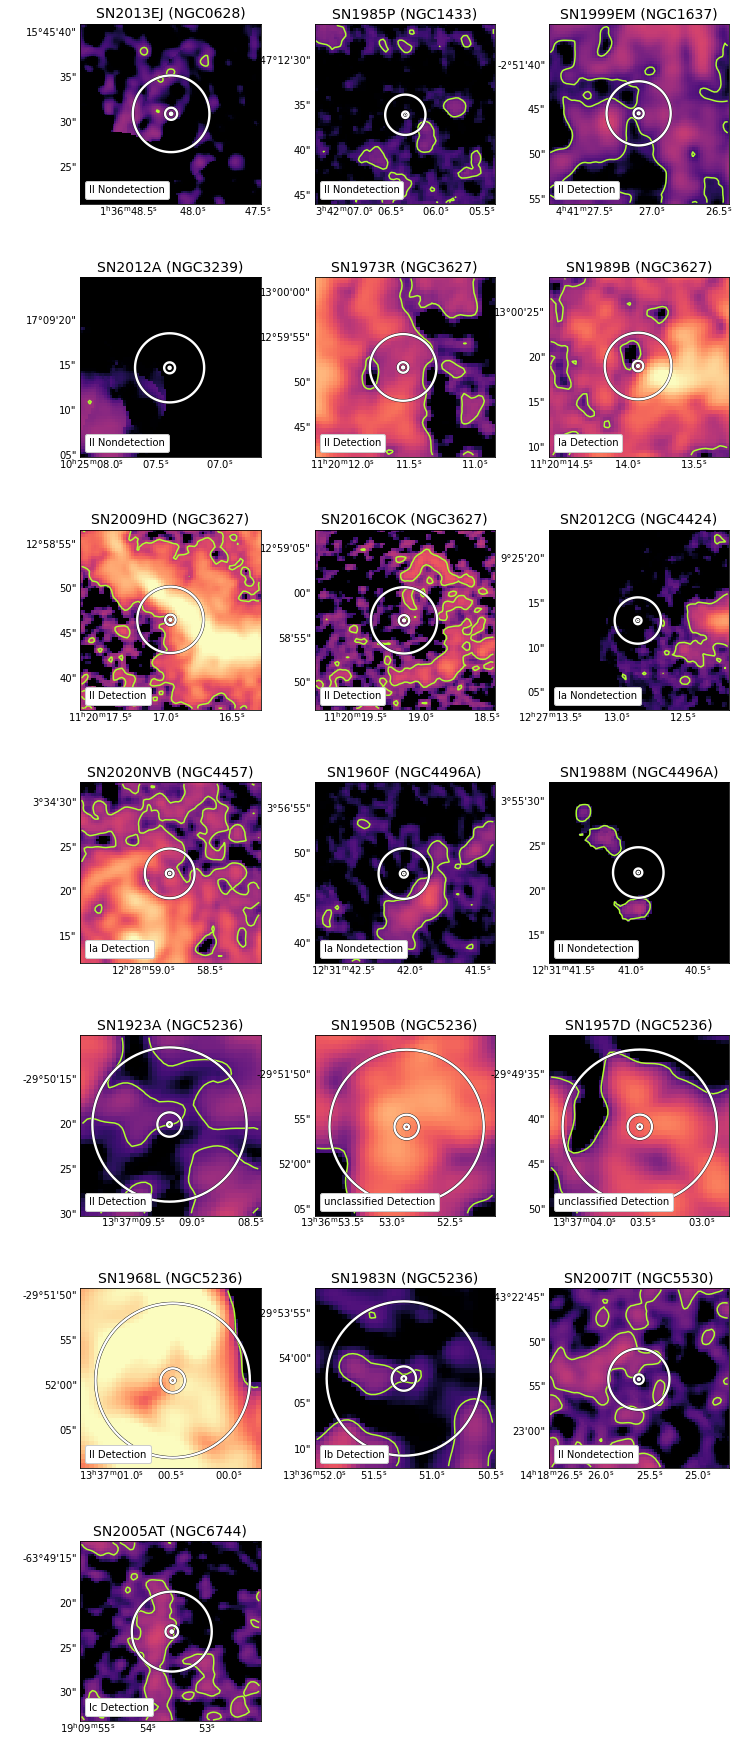

In [26]:
from astropy.coordinates import SkyCoord, Angle
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import astropy.units as u
from astropy.visualization.wcsaxes import SphericalCircle
from matplotlib.patches import Circle
import math

markerShapes = ["o", "s", "p", "D", "X", "H", "v"]
markerSizes  = [210,150,310,150,330,310,350]
markerEdges  = [410,350,610,350,630,610,650]

current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")

numSNe=22
halfBox = 0.00416667 # 15'' in degrees


m,n,p =0,0,0 # plot counters for total number, rows, columns
PLOTS_PER_ROW = 3


fig2, axs = plt.subplots(math.ceil(numSNe/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10, 10))
fig = plt.figure(figsize = (10,30))

for j in range(len(SNgals)): # counter to count galaxy maps
    leglab= SNtypes[j] + " " + isDetection[j]
    #set up data to use astropy's cutout2D to plot subsections of galaxy map
    data = plots60[j]
    logData = np.log10(data)    
    sigData = sigma60[j]
    wcs=wcss60[j]

    #cutout2D needs skycoord position to carry units
    ra, dec = Angle(SNras[j] * u.degree), Angle(SNdecs[j] * u.degree)
    raRad, decRad  = ra.radian * u.rad, dec.radian * u.rad    
    position = SkyCoord(raRad, decRad) #position is center, use ra & dec of SN location
    size = u.Quantity((20,20), u.arcsec) #size is size of box in arcsec 
    # make 2D cutout, will assign a new wcs to cutout to keep track of coords
    cutout = Cutout2D(logData, position, size, wcs) 
    # use this new wcs when converting to pixels to add additional details to plot
    xval, yval = cutout.wcs.wcs_world2pix(ra,dec, 0)
    # get S-N-R data for contours
    sigCutout = Cutout2D(sigData, position, size, wcs)

    titleStr = SNnames[j].upper() + " (" + SNgals[j].upper() + ")"
    # make plot
    axs[m][n] = fig.add_subplot(7,3,p+1,projection = cutout.wcs)
    axs[m][n].set_title(titleStr, fontsize=14)            
    axs[m][n].imshow(cutout.data, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.5, zorder = 0)
    axs[m][n].scatter(xval, yval, color = "black", marker ="", s = 60, zorder=2)
    axs[m][n].scatter(xval, yval, color = "white", marker = "", s = 80, edgecolor="black",zorder = 2, label=leglab)
    axs[m][n].set_ylabel(" ")
    axs[m][n].set_xlabel(" ")
    axs[m][n].tick_params(axis = "both", direction = "in", length = 0)
    axs[m][n].contour(sigCutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), zorder = 1)

    #get spheres of influence
    spheres = angSizes[j]
    c50a = SphericalCircle((ra,dec), spheres[0] * u.degree, ec = "black", fill = False, lw=3.1,transform=axs[m][n].get_transform('world'))
    c50b = SphericalCircle((ra,dec), spheres[0] * u.degree, ec = "white", fill = False,lw=2.4,transform=axs[m][n].get_transform('world'))
    c100a = SphericalCircle((ra,dec), spheres[1] * u.degree, ec = "black", fill = False,lw=3.1,transform=axs[m][n].get_transform('world'))
    c100b = SphericalCircle((ra,dec), spheres[1] * u.degree, ec = "white", fill = False, lw=2.4,transform=axs[m][n].get_transform('world'))
    c200a = SphericalCircle((ra,dec), spheres[2] * u.degree, ec = "black", fill = False, lw=3.1,transform=axs[m][n].get_transform('world'))
    c200b = SphericalCircle((ra,dec), spheres[2] * u.degree, ec = "white", fill = False, lw=2.4,transform=axs[m][n].get_transform('world'))
    c = [c50a, c50b, c100a,c100b,c200a,c200b]
    for q in range(len(c)):
        axs[m][n].add_patch(c[q])

    #get Pixel distance for scalebar
    pixDists=[]
    for i in range(len(spheres)):
        sphereEdgeRa, sphereEdgeDec = ra + Angle(spheres[i]*u.degree), dec + Angle(spheres[i]*u.degree)
        sphereEdgex, sphereEdgey = cutout.wcs.wcs_world2pix(sphereEdgeRa, sphereEdgeDec, 0)
        pixDistx, pixDisty = sphereEdgex-xval, sphereEdgey-yval
        pixDists.append(np.sqrt((pixDistx**2 + pixDisty**2)/2))

    lowerleftra  = ra.value + halfBox 
    lowerleftdec = dec.value - halfBox + halfBox*0.1
    val=spheres[1]

    xArr, yArr = np.linspace(lowerleftra, lowerleftra-val, 100),np.linspace(lowerleftdec, lowerleftdec, 100)
    #axs[m][n].plot(xArr,yArr, color='white', linestyle='-', transform=axs[m][n].get_transform("world"))
    #axs[m][n].text(lowerleftra, lowerleftdec, '100pc', color='white', transform=axs[m][n].get_transform('world'))
#             axs[m][n].text(0,0,isDetection[j],color="cyan", weight='bold', fontsize=16)    
    axs[m][n].legend(handlelength=0, handletextpad=0, loc="lower left", facecolor='white', framealpha=1.0)
    #iterate over m rows, n columns, and p is total number of plots
#    draw_circle = plt.Circle((6,6),ppb60[m], fill = True, color = 'white')
#    axs[m][n].add_patch(draw_circle)

    n+=1
    if n%PLOTS_PER_ROW==0:
        m+=1
        n=0
    p +=1

    plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 1.001, top = 0.9, wspace = 0.3, hspace = 0.2)
#plt.tight_layout(pad=0.5, w_pad=6.8, h_pad=1.0)
fig.savefig("../Figures/Zooms_60pc.pdf", dpi=300)
plt.show()


In [ ]:
print(isDetection)